# **HackBio Bioinformatics Internship - Drug Discovery **

In this Jupyter notebook, we will be building a real-life **data science project**
Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

## **Section 1**
### **ChEMBL Database**

#### Install necessary libraries

In [1]:
!pip install chembl-webresource-client
!pip install rdkit-pypi
!pip install mordred

ERROR: Could not find a version that satisfies the requirement rdkit-pypi (from versions: none)
ERROR: No matching distribution found for rdkit-pypi
  Preparing metadata (setup.py) ... done
  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 28.0 MB/s eta 0:00:00
Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl (13.7 MB)
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176718 sha256=8fde3409768392ca786ee97573b150c519ae392332bf9c062d2f74e500ed8f14
  Stored in directory: /Users/mac/Library/Caches/pip/wheels/e8/79/b8/f4f1dfbb736c2b8605cf5068cd633f4d2869defb89908aef93
Successfully built mordred
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.1
    Uninstalling numpy-2.1.1:
      Successfully uninstalled numpy-2.1.1
  Attempting uninstall: networkx
    Found existing installation: networkx 3.3
    Uninstalling networkx-3.3:
      Successfully uninsta

### Import libraries

In [7]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client
import numpy as np
import rdkit
from rdkit.Chem import Descriptors, Lipinski
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from mordred import Calculator, descriptors


ModuleNotFoundError: No module named 'rdkit'

### **Target protein search**

Our target **Epidermal growth factor receptor (EGFR)** is from **homo sapiens**, **single protein** and has more  than **1000 compounds**.

In [12]:
# Target searchb
my_target = new_client.target
my_target_query = my_target.search('human pancreatic amylase')
my_targets = pd.DataFrame.from_dict(my_target_query)
my_targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P04746', 'xref_name': None, 'xre...",Homo sapiens,Pancreatic alpha-amylase,28.0,False,CHEMBL2045,"[{'accession': 'P04746', 'component_descriptio...",SINGLE PROTEIN,9606.0
1,"[{'xref_id': 'P00689', 'xref_name': None, 'xre...",Rattus norvegicus,Pancreatic alpha-amylase,28.0,False,CHEMBL2699,"[{'accession': 'P00689', 'component_descriptio...",SINGLE PROTEIN,10116.0
2,"[{'xref_id': 'P00690', 'xref_name': None, 'xre...",Sus scrofa,Pancreatic alpha-amylase,28.0,False,CHEMBL5730,"[{'accession': 'P00690', 'component_descriptio...",SINGLE PROTEIN,9823.0
3,"[{'xref_id': 'P16233', 'xref_name': None, 'xre...",Homo sapiens,Pancreatic lipase,17.0,False,CHEMBL1812,"[{'accession': 'P16233', 'component_descriptio...",SINGLE PROTEIN,9606.0
4,[],Sus scrofa,Pancreatic triacylglycerol lipase,17.0,False,CHEMBL1687677,"[{'accession': 'P00591', 'component_descriptio...",SINGLE PROTEIN,9823.0
...,...,...,...,...,...,...,...,...,...
278,"[{'xref_id': 'Q7TT86', 'xref_name': None, 'xre...",Rattus norvegicus,Somatostatin receptor,3.0,False,CHEMBL5264,"[{'accession': 'Q7TT86', 'component_descriptio...",SINGLE PROTEIN,10116.0
279,[],Canis lupus familiaris,Somatostatin receptor subtype 3,3.0,False,CHEMBL3580524,"[{'accession': 'Q4L144', 'component_descriptio...",SINGLE PROTEIN,9615.0
280,[],Homo sapiens,Cytochrome P450,3.0,False,CHEMBL4523986,"[{'accession': 'P08684', 'component_descriptio...",PROTEIN FAMILY,9606.0
281,[],Homo sapiens,Secretory phospholipase A2,3.0,False,CHEMBL4524005,"[{'accession': 'Q5R387', 'component_descriptio...",PROTEIN FAMILY,9606.0


### **Select and retrieve bioactivity data for target**

We will assign the first entry (which corresponds to the target protein, *Epidermal growth factor receptor erbB1*) to the ***selected_target*** variable

In [4]:
selected_target = my_targets.target_chembl_id[0]
selected_target

'CHEMBL203'

Here, we will retrieve only bioactivity data for *Epidermal growth factor receptor erbB1* (CHEMBL203) that are reported as pChEMBL values.

In [5]:
activity = new_client.activity
data = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [6]:
df = pd.DataFrame.from_dict(data)

In [7]:
df.head(5)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,32260,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.041
1,None,None,32263,[],CHEMBL621151,Inhibition of autophosphorylation of human epi...,F,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.3
2,None,None,32265,[],CHEMBL615325,Inhibition of ligand-induced proliferation in ...,F,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,7.82
3,None,None,32267,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.17
4,None,None,32270,[],CHEMBL621151,Inhibition of autophosphorylation of human epi...,F,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.04


## **Handling missing data**
If any compounds has missing value for the **standard_value** and **canonical_smiles** column then drop it.

In [8]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

<ipython-input-8-955aac5800f0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,32260,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.041
1,None,None,32263,[],CHEMBL621151,Inhibition of autophosphorylation of human epi...,F,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.3
2,None,None,32265,[],CHEMBL615325,Inhibition of ligand-induced proliferation in ...,F,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,7.82
3,None,None,32267,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.17
4,None,None,32270,[],CHEMBL621151,Inhibition of autophosphorylation of human epi...,F,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17281,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25105762,[],CHEMBL5263207,Inhibition of wild type EGFR (unknown origin) ...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,nM,UO_0000065,None,202.5
17282,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25105763,[],CHEMBL5263207,Inhibition of wild type EGFR (unknown origin) ...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,nM,UO_0000065,None,26.9
17283,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25105764,[],CHEMBL5263207,Inhibition of wild type EGFR (unknown origin) ...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,nM,UO_0000065,None,228.9
17284,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25106404,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5263429,Inhibition of EGFR (unknown origin) using (Glu...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,7.67


In [9]:
len(df2.canonical_smiles.unique())

9794

In [10]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
# Reset the index of the DataFrame and drop the old index
df2_nr = df2_nr.reset_index(drop=True)

# Display the DataFrame with the reset index
df2_nr

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,32260,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.041
1,None,None,32267,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.17
2,None,None,32680,[],CHEMBL677833,In vitro inhibition of Epidermal growth factor...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,9.3
3,None,None,32770,[],CHEMBL674643,Inhibitory concentration of EGF dependent auto...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,500.0
4,None,None,32772,[],CHEMBL674643,Inhibitory concentration of EGF dependent auto...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9789,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25105719,[],CHEMBL5263205,Inhibition of EGFR L858R/T790M mutant (unknown...,B,P00533,"L858R,T790M",BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,nM,UO_0000065,None,4.1
9790,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25105720,[],CHEMBL5263205,Inhibition of EGFR L858R/T790M mutant (unknown...,B,P00533,"L858R,T790M",BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,nM,UO_0000065,None,0.6
9791,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25105721,[],CHEMBL5263205,Inhibition of EGFR L858R/T790M mutant (unknown...,B,P00533,"L858R,T790M",BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,nM,UO_0000065,None,27.7
9792,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25105722,[],CHEMBL5263205,Inhibition of EGFR L858R/T790M mutant (unknown...,B,P00533,"L858R,T790M",BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,nM,UO_0000065,None,3.2


## **Data pre-processing of the bioactivity data**

#### **Combine the 3 columns (molecule_chembl_id, canonical_smiles, standard_value) and bioactivity_class into a DataFrame**

In [11]:
#print the entire column title
columns_list = df2_nr.columns.tolist()

print(columns_list)

['action_type', 'activity_comment', 'activity_id', 'activity_properties', 'assay_chembl_id', 'assay_description', 'assay_type', 'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint', 'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment', 'data_validity_description', 'document_chembl_id', 'document_journal', 'document_year', 'ligand_efficiency', 'molecule_chembl_id', 'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value', 'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id', 'standard_flag', 'standard_relation', 'standard_text_value', 'standard_type', 'standard_units', 'standard_upper_value', 'standard_value', 'target_chembl_id', 'target_organism', 'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type', 'units', 'uo_units', 'upper_value', 'value']


In [12]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.0
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.0
2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,9300.0
3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,500000.0
4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,3000000.0
...,...,...,...
9789,CHEMBL5270334,C=CC(=O)Nc1cc(Nc2ncc(Br)c(Nc3ccc4ccn(C)c4c3)n2...,4.1
9790,CHEMBL5271151,C=CC(=O)Nc1cc(Nc2ncc(Br)c(Nc3ccc4c(c3)CCC4)n2)...,0.6
9791,CHEMBL5265870,C=CC(=O)Nc1cc(Nc2ncc(Br)c(Nc3ccc4c(c3)CCC4)n2)...,27.7
9792,CHEMBL5269747,C=CC(=O)Nc1cc(Nc2ncc(Br)c(Nc3ccc4c(c3)CCC4)n2)...,3.2


### **Labeling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**.

In [13]:
bioactivity_threshold = []
for i in df3.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [14]:
df3.head()

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.0
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.0
2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,9300.0
3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,500000.0
4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,3000000.0


In [15]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df4 = pd.concat([df3, bioactivity_class], axis=1)
df4.head()

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.0,active
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.0,active
2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,9300.0,intermediate
3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,500000.0,inactive
4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,3000000.0,inactive


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

In [16]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import pandas as pd
import numpy as np

In [17]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        # Check if elem is a valid SMILES string before converting
        if isinstance(elem, str):
            mol=Chem.MolFromSmiles(elem)
            moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [18]:
# Calculate lipinski descriptors
df_lipinski = lipinski(df4.canonical_smiles)

In [19]:
df_lipinski.head()

,MW,LogP,NumHDonors,NumHAcceptors
0,383.814,4.45034,3.0,4.0
1,482.903,3.61432,3.0,6.0
2,369.432,4.77200,1.0,6.0
3,283.287,2.31056,2.0,4.0
4,164.160,1.49000,2.0,2.0


In [20]:
df4.head()

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.0,active
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.0,active
2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,9300.0,intermediate
3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,500000.0,inactive
4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,3000000.0,inactive


In [21]:
df_combined = pd.concat([df4,df_lipinski], axis=1)

In [22]:
df_combined.head()

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.0,active,383.814,4.45034,3.0,4.0
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.0,active,482.903,3.61432,3.0,6.0
2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,9300.0,intermediate,369.432,4.77200,1.0,6.0
3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,500000.0,inactive,283.287,2.31056,2.0,4.0
4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,3000000.0,inactive,164.160,1.49000,2.0,2.0


In [23]:
df_combined.standard_value.describe()

,standard_value
count,9794
unique,2807
top,10000.0
freq,565


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [24]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value']:
        try: # this will try to convert i to a float
            i = float(i)
        except ValueError: # if i is not a number, set molar to 0
            molar = 0
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value', axis = 1)

    return x
#Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [25]:
df_final = pIC50(df_combined)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,7.387216
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,6.769551
2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,intermediate,369.432,4.77200,1.0,6.0,5.031517
3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,inactive,283.287,2.31056,2.0,4.0,3.301030
4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,inactive,164.160,1.49000,2.0,2.0,2.522879
...,...,...,...,...,...,...,...,...
9789,CHEMBL5270334,C=CC(=O)Nc1cc(Nc2ncc(Br)c(Nc3ccc4ccn(C)c4c3)n2...,active,591.514,5.10290,3.0,9.0,8.387216
9790,CHEMBL5271151,C=CC(=O)Nc1cc(Nc2ncc(Br)c(Nc3ccc4c(c3)CCC4)n2)...,active,550.505,5.33730,3.0,7.0,9.221849
9791,CHEMBL5265870,C=CC(=O)Nc1cc(Nc2ncc(Br)c(Nc3ccc4c(c3)CCC4)n2)...,active,548.489,5.09130,3.0,7.0,7.557520
9792,CHEMBL5269747,C=CC(=O)Nc1cc(Nc2ncc(Br)c(Nc3ccc4c(c3)CCC4)n2)...,active,578.515,5.09990,3.0,8.0,8.494850


In [26]:
df_final.pIC50.describe()

,pIC50
count,9794.000000
mean,6.495455
std,1.491483
min,1.259637
25%,5.247572
50%,6.531210
75%,7.540608
max,17.299989


## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

In [27]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

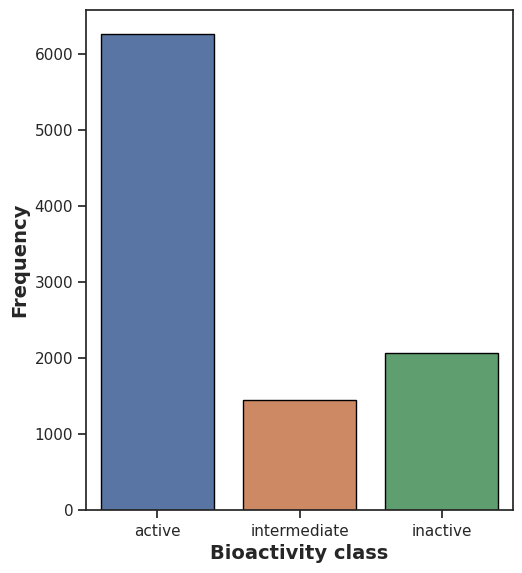

In [28]:
plt.figure(figsize=(5.5, 6.5))

sns.countplot(x='class', data=df_final, edgecolor='black', hue = 'class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('pfht1_plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

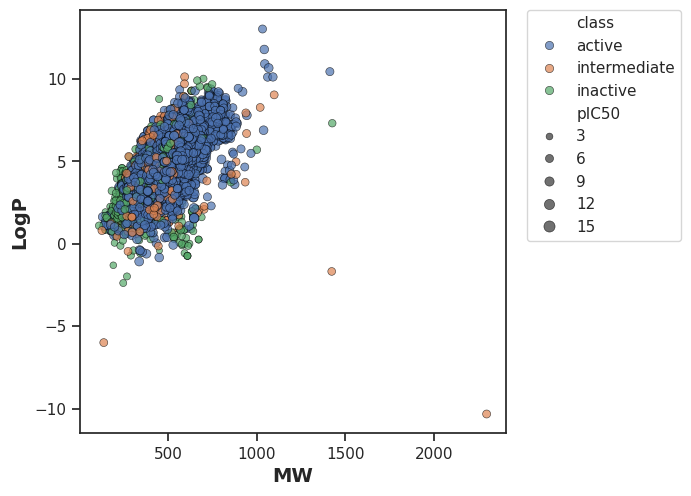

In [29]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_final, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

In [30]:
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,7.387216
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,6.769551
2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,intermediate,369.432,4.77200,1.0,6.0,5.031517
3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,inactive,283.287,2.31056,2.0,4.0,3.301030
4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,inactive,164.160,1.49000,2.0,2.0,2.522879
...,...,...,...,...,...,...,...,...
9789,CHEMBL5270334,C=CC(=O)Nc1cc(Nc2ncc(Br)c(Nc3ccc4ccn(C)c4c3)n2...,active,591.514,5.10290,3.0,9.0,8.387216
9790,CHEMBL5271151,C=CC(=O)Nc1cc(Nc2ncc(Br)c(Nc3ccc4c(c3)CCC4)n2)...,active,550.505,5.33730,3.0,7.0,9.221849
9791,CHEMBL5265870,C=CC(=O)Nc1cc(Nc2ncc(Br)c(Nc3ccc4c(c3)CCC4)n2)...,active,548.489,5.09130,3.0,7.0,7.557520
9792,CHEMBL5269747,C=CC(=O)Nc1cc(Nc2ncc(Br)c(Nc3ccc4c(c3)CCC4)n2)...,active,578.515,5.09990,3.0,8.0,8.494850


In [31]:
#remove NaN
df_cleaned = df_final.dropna()

df_cleaned

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,7.387216
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,6.769551
2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,intermediate,369.432,4.77200,1.0,6.0,5.031517
3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,inactive,283.287,2.31056,2.0,4.0,3.301030
4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,inactive,164.160,1.49000,2.0,2.0,2.522879
...,...,...,...,...,...,...,...,...
9789,CHEMBL5270334,C=CC(=O)Nc1cc(Nc2ncc(Br)c(Nc3ccc4ccn(C)c4c3)n2...,active,591.514,5.10290,3.0,9.0,8.387216
9790,CHEMBL5271151,C=CC(=O)Nc1cc(Nc2ncc(Br)c(Nc3ccc4c(c3)CCC4)n2)...,active,550.505,5.33730,3.0,7.0,9.221849
9791,CHEMBL5265870,C=CC(=O)Nc1cc(Nc2ncc(Br)c(Nc3ccc4c(c3)CCC4)n2)...,active,548.489,5.09130,3.0,7.0,7.557520
9792,CHEMBL5269747,C=CC(=O)Nc1cc(Nc2ncc(Br)c(Nc3ccc4c(c3)CCC4)n2)...,active,578.515,5.09990,3.0,8.0,8.494850


In [32]:
#subset the pIC50
pIC = df_final[("pIC50")]

In [33]:
# There might be one or more valid SMILES that can represent one compound
# Thanks to Pat Walters for this information,checkout his excellent blog: https://www.blogger.com/profile/18223198920629617711
def canonical_smiles(smiles):
    mols = [Chem.MolFromSmiles(smi) for smi in smiles]
    smiles = [Chem.MolToSmiles(mol) for mol in mols]
    return smiles

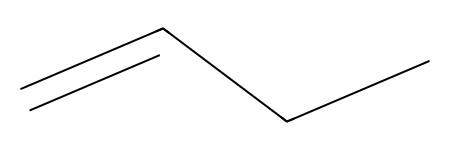

In [34]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

Chem.MolFromSmiles('C=CCC')

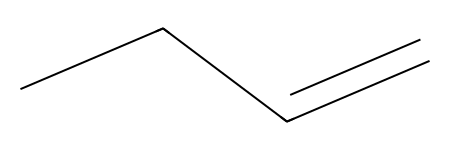

In [35]:
Chem.MolFromSmiles('CCC=C')

## Calculate descriptors using RDkit

### a. General molecular descriptors-about 200 molecular descriptors

In [36]:
def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles]
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()

    Mol_descriptors =[]
    for mol in mols:
        # add hydrogens to molecules
        mol=Chem.AddHs(mol)
        # Calculate all 200 descriptors for each molecule
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names

In [37]:
# Function call
Mol_descriptors,desc_names = RDkit_descriptors(df_cleaned["canonical_smiles"])

In [38]:
df_with_200_descriptors = pd.DataFrame(Mol_descriptors,columns=desc_names)
df_with_200_descriptors

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,14.205904,-3.279600,14.205904,0.014176,0.583357,383.814,368.694,383.094916,136,0,...,0,0,0,0,0,0,0,0,0,0
1,14.386785,-3.932638,14.386785,0.006055,0.489619,482.903,462.743,482.126944,174,0,...,0,0,0,0,0,0,0,0,0,0
2,8.794861,-3.421084,8.794861,0.102909,0.391062,369.432,350.280,369.170194,138,0,...,0,0,0,0,0,0,0,0,0,0
3,12.518102,-3.895481,12.518102,0.561701,0.804599,283.287,270.183,283.095691,106,0,...,0,0,0,0,0,0,0,0,0,0
4,10.996141,-1.465112,10.996141,0.614630,0.650834,164.160,156.096,164.047344,62,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9789,13.513768,-4.362312,13.513768,0.023706,0.243625,591.514,560.266,590.175334,202,0,...,0,0,0,0,0,0,0,0,0,0
9790,13.351285,-4.622305,13.351285,0.018831,0.294177,550.505,518.249,549.185171,188,0,...,0,0,0,0,0,0,0,0,0,0
9791,13.352175,-4.237930,13.352175,0.007882,0.354902,548.489,518.249,547.169521,186,0,...,0,0,0,0,0,0,0,0,0,0
9792,13.506600,-4.372045,13.506600,0.049422,0.318229,578.515,546.259,577.180085,198,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
fp_pIC = pd.concat([df_with_200_descriptors, df_lipinski, pIC], axis=1)

In [40]:
fp_pIC.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,14.205904,-3.279600,14.205904,0.014176,0.583357,383.814,368.694,383.094916,136,0,...,0,0,0,0,0,383.814,4.45034,3.0,4.0,7.387216
1,14.386785,-3.932638,14.386785,0.006055,0.489619,482.903,462.743,482.126944,174,0,...,0,0,0,0,0,482.903,3.61432,3.0,6.0,6.769551
2,8.794861,-3.421084,8.794861,0.102909,0.391062,369.432,350.280,369.170194,138,0,...,0,0,0,0,0,369.432,4.77200,1.0,6.0,5.031517
3,12.518102,-3.895481,12.518102,0.561701,0.804599,283.287,270.183,283.095691,106,0,...,0,0,0,0,0,283.287,2.31056,2.0,4.0,3.301030
4,10.996141,-1.465112,10.996141,0.614630,0.650834,164.160,156.096,164.047344,62,0,...,0,0,0,0,0,164.160,1.49000,2.0,2.0,2.522879


In [41]:
# the Molecular is now in duplicate, one from Lipinski df (MW) and the other from the molecular descriptor (MolWt), you can drop one
fp_pIC = fp_pIC.drop('MW', axis=1)

In [42]:
fp_pIC

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,LogP,NumHDonors,NumHAcceptors,pIC50
0,14.205904,-3.279600,14.205904,0.014176,0.583357,383.814,368.694,383.094916,136,0,...,0,0,0,0,0,0,4.45034,3.0,4.0,7.387216
1,14.386785,-3.932638,14.386785,0.006055,0.489619,482.903,462.743,482.126944,174,0,...,0,0,0,0,0,0,3.61432,3.0,6.0,6.769551
2,8.794861,-3.421084,8.794861,0.102909,0.391062,369.432,350.280,369.170194,138,0,...,0,0,0,0,0,0,4.77200,1.0,6.0,5.031517
3,12.518102,-3.895481,12.518102,0.561701,0.804599,283.287,270.183,283.095691,106,0,...,0,0,0,0,0,0,2.31056,2.0,4.0,3.301030
4,10.996141,-1.465112,10.996141,0.614630,0.650834,164.160,156.096,164.047344,62,0,...,0,0,0,0,0,0,1.49000,2.0,2.0,2.522879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9789,13.513768,-4.362312,13.513768,0.023706,0.243625,591.514,560.266,590.175334,202,0,...,0,0,0,0,0,0,5.10290,3.0,9.0,8.387216
9790,13.351285,-4.622305,13.351285,0.018831,0.294177,550.505,518.249,549.185171,188,0,...,0,0,0,0,0,0,5.33730,3.0,7.0,9.221849
9791,13.352175,-4.237930,13.352175,0.007882,0.354902,548.489,518.249,547.169521,186,0,...,0,0,0,0,0,0,5.09130,3.0,7.0,7.557520
9792,13.506600,-4.372045,13.506600,0.049422,0.318229,578.515,546.259,577.180085,198,0,...,0,0,0,0,0,0,5.09990,3.0,8.0,8.494850


In [43]:
# Remove rows with any NaN or missing values from the DataFrame
fp_pIC_cleaned = fp_pIC.dropna()

# Display the cleaned DataFrame
fp_pIC_cleaned

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,LogP,NumHDonors,NumHAcceptors,pIC50
0,14.205904,-3.279600,14.205904,0.014176,0.583357,383.814,368.694,383.094916,136,0,...,0,0,0,0,0,0,4.45034,3.0,4.0,7.387216
1,14.386785,-3.932638,14.386785,0.006055,0.489619,482.903,462.743,482.126944,174,0,...,0,0,0,0,0,0,3.61432,3.0,6.0,6.769551
2,8.794861,-3.421084,8.794861,0.102909,0.391062,369.432,350.280,369.170194,138,0,...,0,0,0,0,0,0,4.77200,1.0,6.0,5.031517
3,12.518102,-3.895481,12.518102,0.561701,0.804599,283.287,270.183,283.095691,106,0,...,0,0,0,0,0,0,2.31056,2.0,4.0,3.301030
4,10.996141,-1.465112,10.996141,0.614630,0.650834,164.160,156.096,164.047344,62,0,...,0,0,0,0,0,0,1.49000,2.0,2.0,2.522879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9789,13.513768,-4.362312,13.513768,0.023706,0.243625,591.514,560.266,590.175334,202,0,...,0,0,0,0,0,0,5.10290,3.0,9.0,8.387216
9790,13.351285,-4.622305,13.351285,0.018831,0.294177,550.505,518.249,549.185171,188,0,...,0,0,0,0,0,0,5.33730,3.0,7.0,9.221849
9791,13.352175,-4.237930,13.352175,0.007882,0.354902,548.489,518.249,547.169521,186,0,...,0,0,0,0,0,0,5.09130,3.0,7.0,7.557520
9792,13.506600,-4.372045,13.506600,0.049422,0.318229,578.515,546.259,577.180085,198,0,...,0,0,0,0,0,0,5.09990,3.0,8.0,8.494850


In [44]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# dataframe contains 200 descriptor columns and a target column 'pIC50'
X = fp_pIC_cleaned.drop(columns=['pIC50'])  # Features: the 200 descriptors
y = fp_pIC_cleaned['pIC50']  # Target: pIC50 values (or any other target)

# Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# feature importance to know which descriptors contribute the most
importances = model.feature_importances_
descriptor_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(descriptor_importances)


Mean Squared Error: 0.8864567958937268
SMR_VSA3                  0.117206
PEOE_VSA3                 0.040758
SMR_VSA7                  0.032501
PEOE_VSA10                0.027051
SlogP_VSA10               0.021219
                            ...   
SMR_VSA8                  0.000000
fr_lactam                 0.000000
fr_isocyan                0.000000
SlogP_VSA9                0.000000
fr_nitro_arom_nonortho    0.000000
Length: 211, dtype: float64


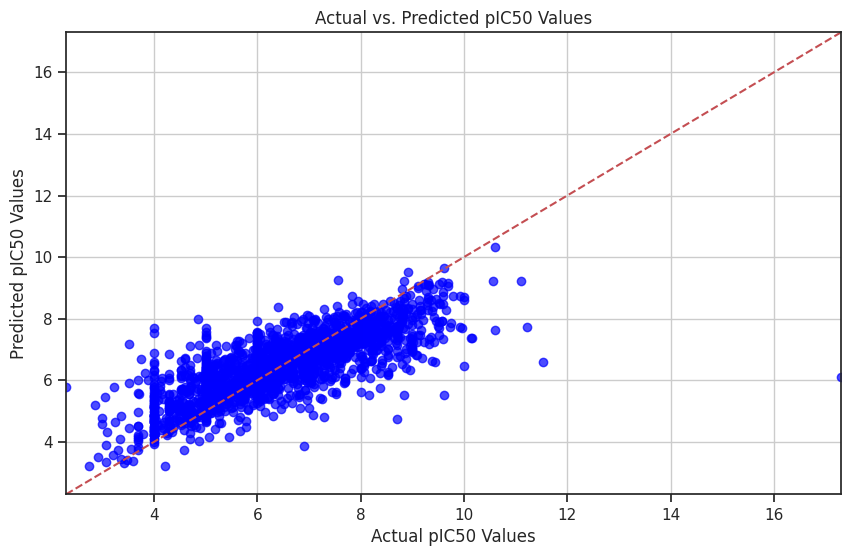

In [48]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of equality
plt.xlabel('Actual pIC50 Values')
plt.ylabel('Predicted pIC50 Values')
plt.title('Actual vs. Predicted pIC50 Values')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()

In [45]:
descriptor_importances

,0
SMR_VSA3,0.117206
PEOE_VSA3,0.040758
SMR_VSA7,0.032501
PEOE_VSA10,0.027051
SlogP_VSA10,0.021219
...,...
SMR_VSA8,0.000000
fr_lactam,0.000000
fr_isocyan,0.000000
SlogP_VSA9,0.000000


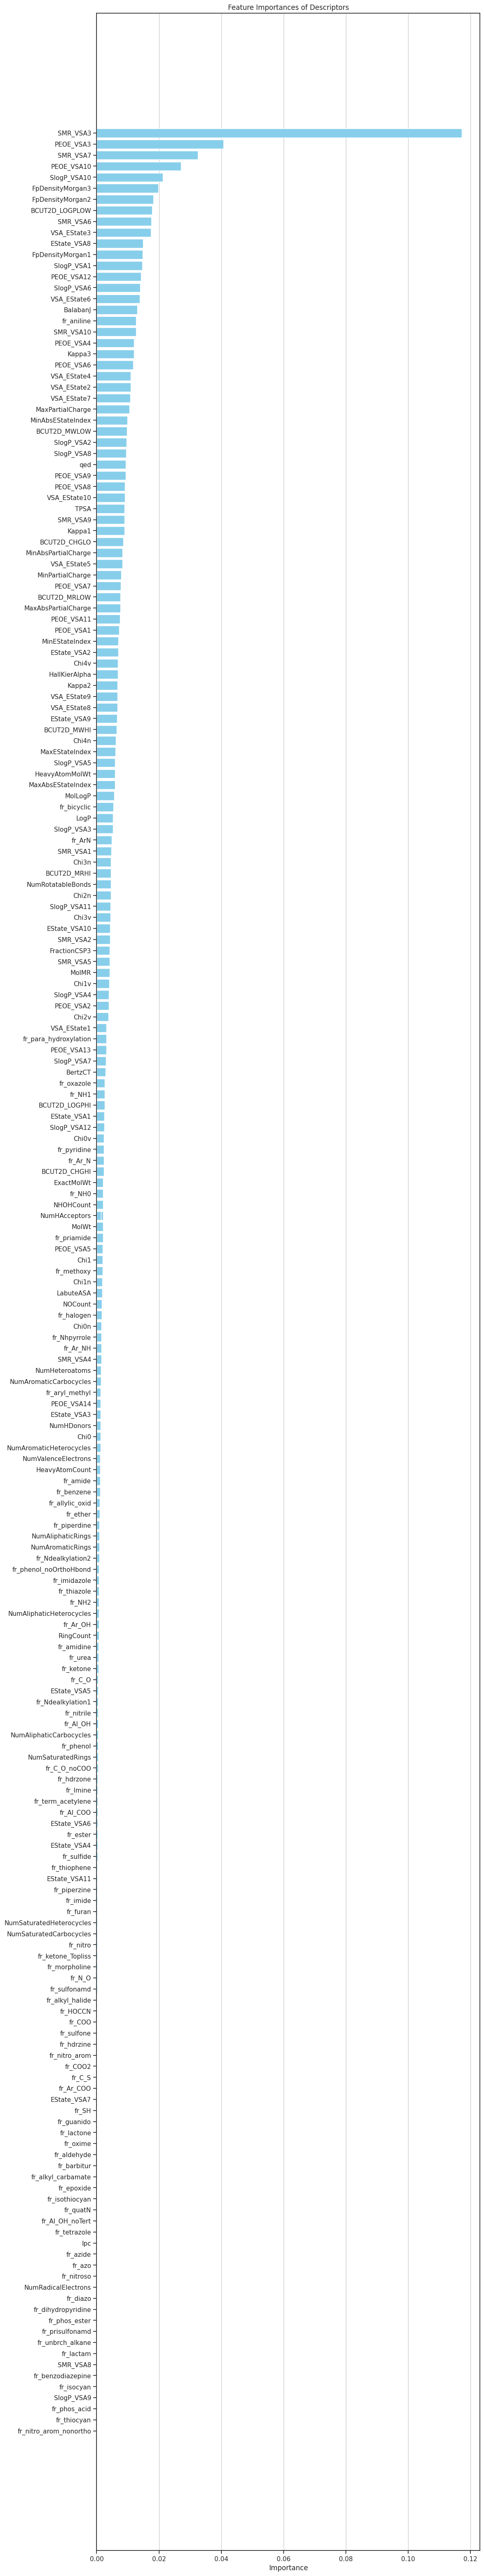

Plot saved as 'descriptor_importances.pdf'.


In [54]:
import matplotlib.pyplot as plt

# Sort the feature importances
sorted_importances = descriptor_importances.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 80))
plt.barh(sorted_importances.index, sorted_importances.values, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances of Descriptors')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.grid(axis='x')
plt.show()

# Save the plot as a PDF
plt.savefig('descriptor_importances.pdf', bbox_inches='tight')  # Save as PDF
plt.close()  # Close the plot to prevent it from displaying in Colab

# Optionally, display a message
print("Plot saved as 'descriptor_importances.pdf'.")

In [46]:
#calculate the r2 score
from sklearn.metrics import r2_score

# Assuming you already have y_test (actual values) and y_pred (predicted values)
r2 = r2_score(y_test, y_pred)

print(f'R² Score: {r2}')

R² Score: 0.6084744098932444


In [47]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Assume df contains your features and target
X = fp_pIC_cleaned.drop(columns=['pIC50'])  # Features
y = fp_pIC_cleaned['pIC50']  # Target variable

# Scale the features if necessary
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Set up K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Perform cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')

# Convert to positive MSE
mse_scores = -cv_scores

# Print the cross-validated MSE scores
print(f'Cross-Validated MSE Scores: {mse_scores}')
print(f'Mean MSE: {mse_scores.mean()}')
print(f'Standard Deviation of MSE: {mse_scores.std()}')

Cross-Validated MSE Scores: [0.89005438 0.74349824 0.71282285 0.76562723 0.7942607 ]
Mean MSE: 0.7812526805006911
Standard Deviation of MSE: 0.060595731456859404


In [55]:
# Save the MSE scores to a DataFrame and then to a CSV file
scores_df = pd.DataFrame({'Fold': range(1, len(mse_scores) + 1), 'MSE': mse_scores})
scores_df.to_csv('cross_validated_mse_scores.csv', index=False)  # Save as CSV

print("MSE scores saved as 'cross_validated_mse_scores.csv'.")

MSE scores saved as 'cross_validated_mse_scores.csv'.
